In [1]:
#Simply just importing the basic needed libraries and methods used in the preprocessing stage
import numpy as np  
import tensorflow as tf
from skimage.color import rgb2gray
import io 
from os import listdir
from skimage import io
from skimage import transform
import imageio
import os
import matplotlib.pyplot as plt

In [2]:
#Defining a function which returns the directory names and labels of all the images in our dataset

def dir_labels(main_dir):
    m_labels = [label for label in listdir(main_dir) if os.path.isdir(os.path.join(main_dir, label))]
    directory = []
    labels = []
    for label in m_labels:
        for f in listdir(os.path.join(main_dir, label)):
            if f.endswith('.jpg'):
                labels.append(label)
                directory.append(os.path.join(main_dir, label, f))
    return directory, labels

In [3]:
train_directory, train_labels = dir_labels(r'E:\DataSets\Digits\synthetic_digits\imgs_train')
test_directory, test_labels = dir_labels(r'E:\DataSets\Digits\synthetic_digits\imgs_valid')

In [4]:
#Reading the images from the given directories whilst rescaling them for training puposes

train_images = []
for directory in train_directory:
    train_images.append(transform.resize(imageio.imread(directory), [128, 128]))
test_images = []
for directory in test_directory:
    test_images.append(transform.resize(imageio.imread(directory), [128, 128]))

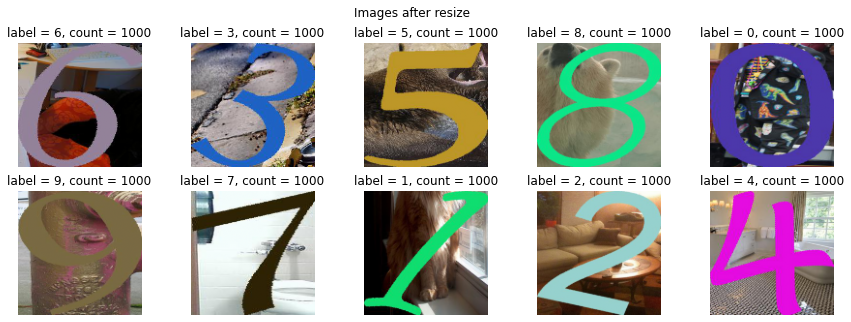

In [5]:
# Just graphing the images after resize to see if they've loaded correctly and resized

fig = plt.figure(figsize = (15, 5))
plt.axis('off')
i = 1
plt.suptitle('Images after resize')
for label in set(train_labels):
    plt.subplot(2, 5, i)
    plt.axis('off')
    plt.imshow(train_images[train_labels.index(label)])
    plt.title('label = {}, count = {}'.format(label, train_labels.count(label)))
    i += 1
    
plt.show()

In [6]:
# Transforming the labels to categorical data to be able to train on it

from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

In [7]:
# Converting training and testing, images and labels; into numpy arrays to be compatable with tf

train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [8]:
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [9]:
print(tf.shape(test_images))
print(tf.shape(test_labels))

tf.Tensor([2000  128  128    3], shape=(4,), dtype=int32)
tf.Tensor([2000   10], shape=(2,), dtype=int32)


In [10]:
# Peforming Train test split for the training data to get validation data

from sklearn.model_selection import train_test_split
train_images, vald_images, train_labels, vald_labels = train_test_split(train_images, train_labels, test_size = 0.2, random_state = 42)

In [11]:
# Importing general libraries to build the model

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D


In [12]:
# Building the model

model = Sequential()
model.add(Conv2D(2, (3, 3), padding = 'same', input_shape = (128, 128, 3)))
model.add(layers.MaxPooling2D())
model.add(layers.BatchNormalization(axis=-1))
model.add(Conv2D(32, (3, 3), padding = 'same'))
model.add(layers.MaxPooling2D())
model.add(layers.BatchNormalization(axis=-1))
model.add(Conv2D(128, (1, 1), padding = 'same'))
model.add(layers.MaxPooling2D())
model.add(layers.BatchNormalization(axis=-1))
model.add(Conv2D(256, (1, 1), padding = 'same'))
model.add(layers.MaxPooling2D())
model.add(layers.BatchNormalization(axis=-1))
model.add(layers.Flatten())
        
model.add(Dense(512, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
n_epochs = 10


In [13]:
# Fitting it

history = model.fit(train_images, train_labels, epochs = n_epochs, validation_data = (vald_images, vald_labels))

Epoch 1/10
250/250 [==============================] - 7s 13ms/step - loss: 1.8232 - accuracy: 0.4392 - val_loss: 1.3839 - val_accuracy: 0.5445
Epoch 2/10
250/250 [==============================] - 3s 11ms/step - loss: 0.3772 - accuracy: 0.8798 - val_loss: 0.4044 - val_accuracy: 0.8730
Epoch 3/10
250/250 [==============================] - 3s 11ms/step - loss: 0.1557 - accuracy: 0.9473 - val_loss: 0.4459 - val_accuracy: 0.8920
Epoch 4/10
250/250 [==============================] - 3s 11ms/step - loss: 0.0742 - accuracy: 0.9759 - val_loss: 0.2704 - val_accuracy: 0.9300
Epoch 5/10
250/250 [==============================] - 3s 11ms/step - loss: 0.0580 - accuracy: 0.9841 - val_loss: 0.2843 - val_accuracy: 0.9270
Epoch 6/10
250/250 [==============================] - 3s 11ms/step - loss: 0.0359 - accuracy: 0.9899 - val_loss: 0.3500 - val_accuracy: 0.9115
Epoch 7/10
250/250 [==============================] - 3s 11ms/step - loss: 0.1095 - accuracy: 0.9719 - val_loss: 0.4469 - val_accuracy: 0.8980

In [14]:
# Evaluation on the testing data

accuracy = model.evaluate(test_images, test_labels, batch_size = 32)[1]
loss = model.evaluate(test_images, test_labels, batch_size = 32)[0]
print(f"Accuracy = {accuracy*100}%, Loss = {loss}")

63/63 [==============================] - 0s 5ms/step - loss: 0.2496 - accuracy: 0.9475
Accuracy = 94.74999904632568%, Loss = 0.2495880275964737


In [15]:
predictions = model.predict(test_images)
predictions = [np.argmax(predictions[i]) for i in range(len(predictions))]

In [16]:
# Seeing the wrong predictions to see what the model incorrectly classified

real_values = [np.argmax(test_labels[i]) for i in range(len(test_labels))]
wrong_pred_index = [i for i in range(len(real_values)) if predictions[i] != real_values[i]]

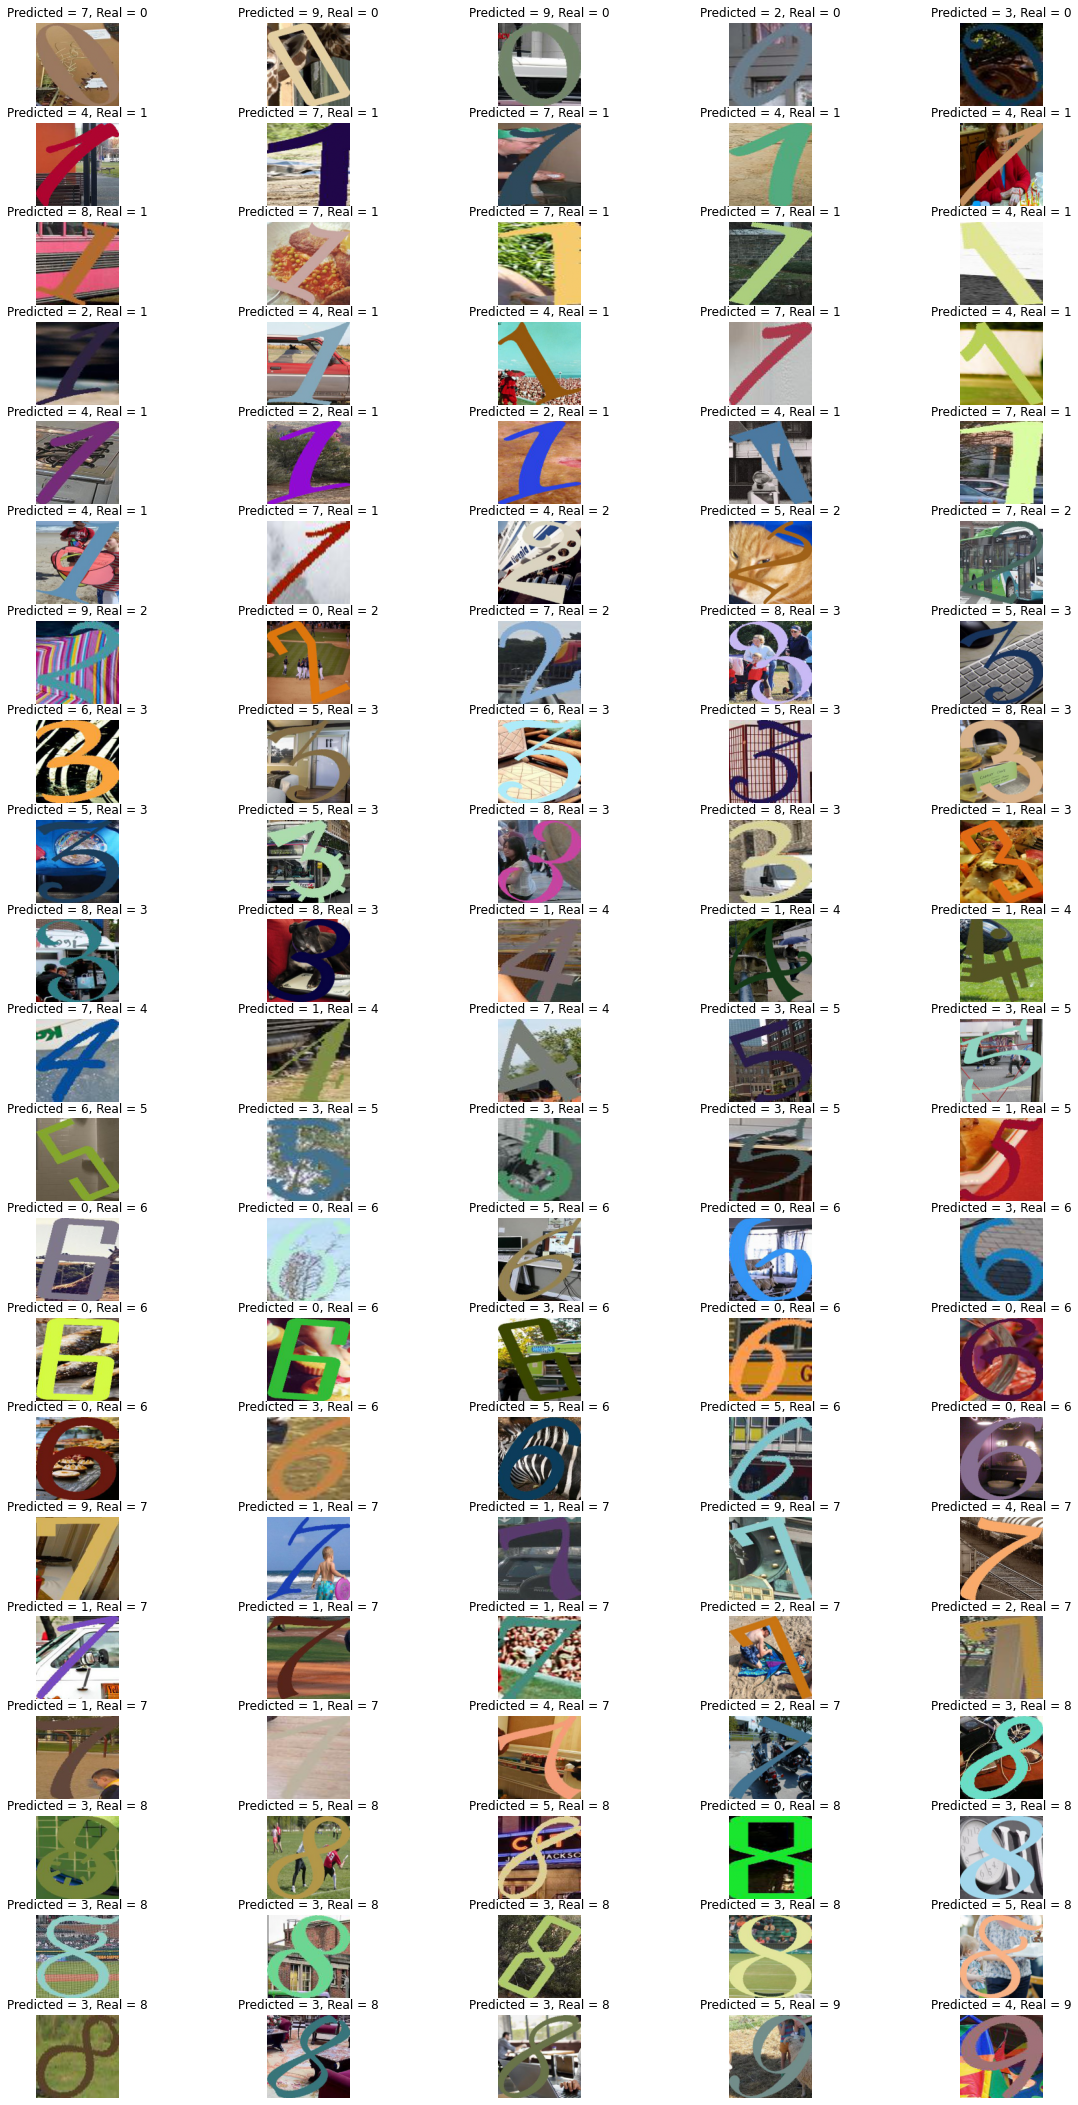

In [17]:
plt.figure(figsize = (20, 40))
for i in range(len(wrong_pred_index)):
    plt.subplot(int(len(wrong_pred_index)/5) + 1, 5, i + 1)
    plt.imshow(test_images[wrong_pred_index[i]])
    plt.axis('off')
    plt.title("Predicted = {}, Real = {}".format(predictions[wrong_pred_index[i]],
                                                             real_values[wrong_pred_index[i]]))
plt.show()
    

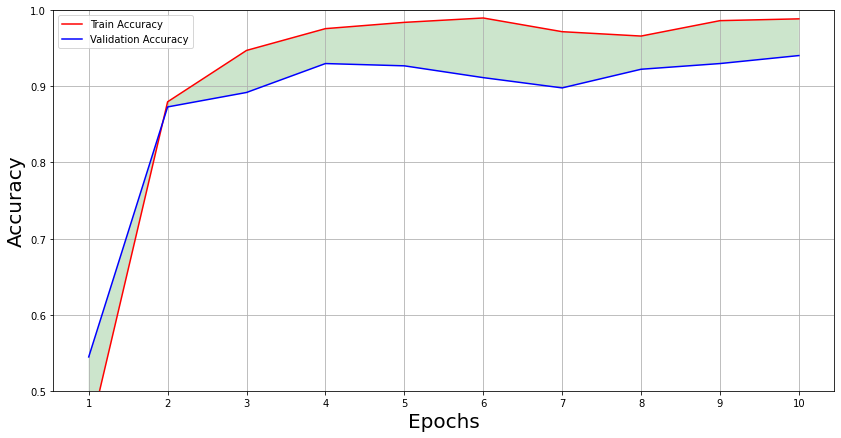

In [18]:
# General graph for accuracy with n_epochs

plt.figure(figsize = (14,7))
x = [i + 1 for i in range(n_epochs)]
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
plt.plot(x, train_accuracy, 'r-', label = 'Train Accuracy')
plt.plot(x, val_accuracy, 'b-', label = 'Validation Accuracy')
plt.legend()
plt.grid()
plt.locator_params(axis='x', nbins=n_epochs)
plt.ylim([0.5, 1])
plt.xlabel('Epochs', fontsize = 20)
plt.ylabel('Accuracy', fontsize = 20)
plt.axis('on')
plt.fill_between(x, train_accuracy, val_accuracy, facecolor = 'g', alpha = 0.2)
plt.show()

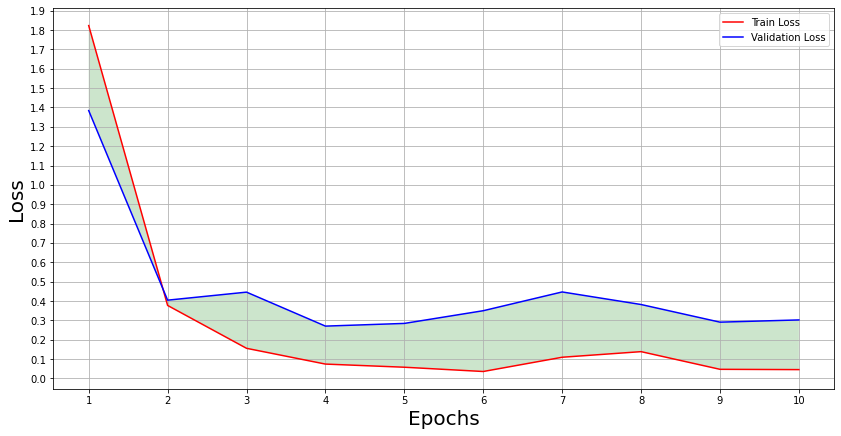

In [19]:
# General graph for loss with n_epochs

plt.figure(figsize = (14, 7))
x = [i + 1 for i in range(n_epochs)]
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(x, train_loss, 'r-', label = 'Train Loss')
plt.plot(x, val_loss, 'b-', label = 'Validation Loss')
plt.legend()
plt.grid()
plt.xlabel('Epochs', fontsize = 20)
plt.ylabel('Loss', fontsize = 20)
plt.locator_params(axis = 'x', nbins = n_epochs)
plt.locator_params(axis = 'y', nbins = 20)
plt.fill_between(x, train_loss, val_loss, facecolor = 'g', alpha = 0.2)